In [6]:
import pandas as pd

evaluation_matrix = pd.read_csv("../data/evaluation/all_customers.csv", delimiter=";")

In [7]:
evaluation_matrix.dtypes

Mean Absolute Error                   float64
Mean Absolute Percentage Error (%)    float64
Mean Absolute Scaled Error            float64
r2                                    float64
Forecast Bias (%)                     float64
modeltype                              object
customer                               object
dtype: object

In [8]:
evaluation_matrix_without_customer = evaluation_matrix.drop(columns=['customer'])
avg_metrics_by_modeltype = evaluation_matrix_without_customer.groupby('modeltype').mean()
avg_metrics_by_modeltype

,Mean Absolute Error,Mean Absolute Percentage Error (%),Mean Absolute Scaled Error,r2,Forecast Bias (%)
modeltype,,,,,
arima,9083.623330,60.017855,7.165201,-2.558833,-18.204003
ets,9872.368815,58.051912,6.163571,-1.069092,-25.692394
forest,4145.776331,20.512944,2.666874,0.544210,1.561567
lstm,8258.424662,39.424831,5.160999,-0.606226,-16.470009
rnn,9285.669572,56.129202,5.762655,-1.289369,-24.070505
xgboost,4418.227019,21.232445,2.846985,0.399277,-1.016532


In [9]:
import pandas as pd
import sys
sys.path.append('../src') 
from app.data_preprocessing import prep_data

customer_a_data = pd.read_json("../data/raw/Forecasting_data_customer_a.json")
customer_b_data = pd.read_json("../data/raw/Forecasting_data_customer_b.json")
customer_c_data = pd.read_json("../data/raw/Forecasting_data_customer_c.json")
customer_d_data = pd.read_json("../data/raw/Forecasting_data_customer_d.json")
customer_e_data = pd.read_json("../data/raw/Forecasting_data_customer_e.json")
customer_f_data = pd.read_json("../data/raw/Forecasting_data_customer_f.json")
customer_g_data = pd.read_json("../data/raw/Forecasting_data_customer_g.json")
customer_h_data = pd.read_json("../data/raw/Forecasting_data_customer_h.json")
customer_i_data = pd.read_json("../data/raw/Forecasting_data_customer_i.json")

customer_a_data = prep_data(customer_a_data)
customer_b_data = prep_data(customer_b_data)
customer_c_data = prep_data(customer_c_data)
customer_d_data = prep_data(customer_d_data)
customer_e_data = prep_data(customer_e_data)
customer_f_data = prep_data(customer_f_data)
customer_g_data = prep_data(customer_g_data)
customer_h_data = prep_data(customer_h_data)
customer_i_data = prep_data(customer_i_data)

In [10]:
customer_a_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3417 entries, 2014-11-19 to 2024-03-27
Freq: D
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Abgabe_movavg          3417 non-null   float64
 1   lag_2__Abgabe_movavg   3417 non-null   float64
 2   lag_4__Abgabe_movavg   3417 non-null   float64
 3   lag_6__Abgabe_movavg   3417 non-null   float64
 4   deklarationen_pro_tag  3417 non-null   float64
 5   Year                   3417 non-null   int32  
 6   Month                  3417 non-null   int32  
 7   Day                    3417 non-null   int32  
 8   dayofweek              3417 non-null   int32  
 9   quarter                3417 non-null   int32  
 10  dayofyear              3417 non-null   int32  
dtypes: float64(5), int32(6)
memory usage: 240.3 KB


In [11]:
import string

customer_data = [
    customer_a_data,
    customer_b_data,
    customer_c_data,
    customer_d_data,
    customer_e_data,
    customer_f_data,
    customer_g_data,
    customer_h_data,
    customer_i_data,
]

info_list = []

for idx, df in enumerate(customer_data, start=1):
    letter_idx = string.ascii_uppercase[idx - 1]
    info_list.append((f"Customer {letter_idx}", df.deklarationen_pro_tag.sum(), df.index[0], df.Abgabe_movavg.min(), df.Abgabe_movavg.max(), df.Abgabe_movavg.mean()))

customer_meta_data = pd.DataFrame(info_list, columns=["customer", "anzahl_deklarationen", "start_datum", "Abgabe_min", "Abgabe_max", "Abgabe_mean"])
customer_meta_data

,customer,anzahl_deklarationen,start_datum,Abgabe_min,Abgabe_max,Abgabe_mean
0,Customer A,8927.0,2014-11-19,0.000000,44524.447143,4627.362294
1,Customer B,44264.0,2021-06-13,1366.762857,97571.500000,22769.405644
2,Customer C,49831.0,2013-01-08,0.000000,144484.751429,46651.220665
3,Customer D,28192.0,2012-01-23,0.000000,251668.664286,36829.898370
4,Customer E,9334.0,2016-03-27,0.000000,100233.981429,1593.788323
5,Customer F,12742.0,2005-01-25,0.000000,54343.032857,5917.828622
6,Customer G,67201.0,2013-04-26,0.000000,32651.495714,9768.081828
7,Customer H,9987.0,2015-04-23,0.000000,271083.325714,24947.956531
8,Customer I,25706.0,2012-06-06,0.000000,47111.692857,10747.996411


Text(0.5, 1.0, 'Gleitender Durschnitt der Abgabe von Kunde G')

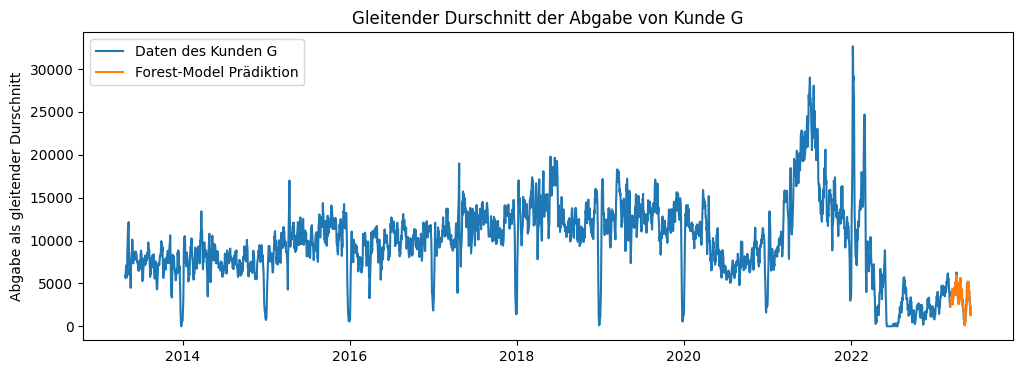

In [32]:
import matplotlib.pyplot as plt

customer_g_prediction = pd.read_csv("../data/prediction/customer_g_forest_2024-04-19_11-14-10_prediction.csv")
last_90_days_index = customer_g_data.index[-90:]

plt.figure(figsize=(12, 4))
plt.plot(customer_g_data.index, customer_g_data.Abgabe_movavg, label="Daten des Kunden G")
plt.plot(last_90_days_index, customer_g_prediction.prediction, label="Forest-Model Prädiktion")
plt.legend()
plt.ylabel("Abgabe als gleitender Durschnitt")
plt.title("Gleitender Durschnitt der Abgabe von Kunde G")